# Part I - (US Police Shootings)
## by (Okolo Uchenna Victor)

## Introduction
In the aftermath of George Floyd's death and the rise of black lives matter(BLM) movement, there has been a lot of debate on racially motivated shootings by cops in the US. I decided to look at police shootings data in the US between 2015 and 2020, to gain insight on the demographics of these shootings across the country.
The data for this analyis was obtained from [Kaggle](https://www.kaggle.com/datasets/ahsen1330/us-police-shootings).

The data contains basic information about the people involved in the shooting e.g. name, age, gender and race. it also contains details of each incident, like date of event, where it happened? how they were shot? did they attack? Were they holding weapons? Did they show any mental illness? Was the policeman wearing a camera/was the incident recorded? Did the suspect flee?


it also contains information on the type of weapon in Possession by suspect at the time of shooting.



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
from datetime import datetime as dt

%matplotlib inline

### Accessing Data

In [3]:
# Load in dataset into pandas dataframe
police_shootings = pd.read_csv('shootings.csv')
police_shootings.head()

id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender      race           city state  signs_of_mental_illness threat_level  \
0      M     Asian        Shelton    WA                     True       attack   
1      M     White          Aloha    OR                    False       attack   
2      M  Hispanic        Wichita    KS                    False        other   
3      M     White  San Francisco    CA                     True       attack   
4      M  Hispanic          Evans    CO                    False       attack   

          flee  body_camera          arms_category  
0  Not fleeing        False                   Guns  
1  Not fleeing        False                   Guns  
2  Not fleeing        False                Unarmed  
3  Not fleeing        False  Other unusual objects  
4  Not fleeing        False       Piercing objects

In [4]:
print(police_shootings.shape)
police_shootings.info()

(4895, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category

In [5]:
police_shootings.describe()

id          age
count  4895.000000  4895.000000
mean   2902.148519    36.549750
std    1683.467910    12.694348
min       3.000000     6.000000
25%    1441.500000    27.000000
50%    2847.000000    35.000000
75%    4352.500000    45.000000
max    5925.000000    91.000000

In [6]:
police_shootings.duplicated().sum()

0

#### Visual Assessment
- name column not descriptive enough
- armed column not descriptive

#### programmatic assessment 
- id column datatype is int instead of string.
- date column has wrong data type
- age column data type is float instead of int.


### Cleaning Data

<div class='alert-success'>
    <ul>
        <li>name column not descriptive enough</li>
        <li>armed column not descriptive</li>
    </ul>
</div>

##### Define
- Rename 'name' column to 'suspect' to make it more precise.
- Rename 'armed' column to 'weapon' to make it more descriptive.

##### Code

In [7]:
police_shootings = police_shootings.rename(columns={'name':'suspect', 'armed':'weapon'})

##### test

In [8]:
print(list(police_shootings))

['id', 'suspect', 'date', 'manner_of_death', 'weapon', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera', 'arms_category']


<div class='alert-success'>
    <ul>
        <li>id column datatype is int instead of string</li>
        <li>date column has wrong data type</li>
        <li>age column data type is float instead of int</li>
    </ul>
</div>

##### Define
- convert 'id' column datatype to strings
- convert 'date' column datatype to datetime
- convert 'age' column datatype to integer

##### Code

In [9]:
police_shootings['id'] = police_shootings['id'].astype('str')
police_shootings['date'] = pd.to_datetime(police_shootings['date'])
police_shootings['age'] = police_shootings['age'].astype('int')

##### test

In [10]:
print(police_shootings['id'].dtype)
print(police_shootings['date'].dtype)
print(police_shootings['age'].dtype)

object
datetime64[ns]
int64


#### Change state Abbreviations to full names using mapping, Create  'year' column and extract year value from the date column as the values of the new column. 

In [11]:
state_abbrev = {'WA':'Washington',
                'OR':'Oregon',
                'KS':'Kansas',
                'CA':'California',
                'CO':'Colorado',
                'OK':'Oklahoma',
                'AZ':'Arizona',
                'IA':'Iowa',
                'PA':'Pennsylvania',
                'TX':'Texas',
                'OH':'Ohio',
                'LA':'Louisiana',
                'MT':'Montana',
                'UT':'Utah',
                'AR':'Arkansas',
                'IL':'Illinois',
                'NV':'Nevada',
                'NM':'New Mexico',
                'MN':'Minnesota',
                'MO':'Missouri',
                'VA':'Virginia',
                'NJ': 'New Jersey',
                'IN':'Indiana',
                'KY':'Kentucky',
                'MA':'Massachusetts',
                'NH':'New Hampshire',
                'FL':'Florida',
                'ID':'Idaho',
                'MD':'Maryland',
                'NE':'Nebraska',
                'MI':'Michigan',
                'GA':'Georgia',
                'TN':'Tennessee',
                'NC':'North Carolina', 
                'AK':'Alaska',
                'NY':'New York',
                'ME':'Maine',
                'AL':'Alabama',
                'MS':'Mississippi',
                'WI':'Wisconsin',
                'SC':'South Carolina',
                'DE':'Delaware',
                'DC':'District of Columbia',
                'WV':'West Virginia',
                'HI':'Hawaii',
                'WY':'Wyoming',
                'ND':'North Dakota',
                'CT':'Connecticut',
                'SD':'South Dakota',
                'VT':'Vermont',
                'RI':'Rhode Island'}
def state_code(x):
    if x['state'] in state_abbrev.keys():
        abbrev = state_abbrev[x['state']]
        return abbrev
    else:
        return x['state']
police_shootings['state'] = police_shootings.apply(state_code, axis=1)

In [12]:
police_shootings['year'] = police_shootings['date'].dt.year
police_shootings.sample(10)

id              suspect       date manner_of_death        weapon  age  \
1644  1899         Charles Dove 2016-09-20            shot           gun   35   
3416  4001        Jalon Johnson 2018-08-29            shot       vehicle   17   
2478  2879  Clarence Belsar III 2017-08-18            shot           gun   26   
3597  4222        Adrian Bunker 2018-11-29            shot       unknown   37   
2957  3463        Ryan L. Smith 2018-03-05            shot         knife   44   
4647  5555       Manuel Arebalo 2020-02-21            shot  sharp object   40   
3249  3794    Jesse Wade Powell 2018-06-20            shot    metal pole   44   
3459  4056          Jaime Lopez 2018-09-25            shot         knife   41   
3929  4646  Michael Allen Felch 2019-04-18            shot           gun   30   
3194  3711         Michael Glad 2018-05-28            shot           gun   23   

     gender      race            city         state  signs_of_mental_illness  \
1644      M     White  Decatur County     Tennessee                    False   
3416      M     Black         Houston         Texas                    False   
2478      M     White      Fairchance  Pennsylvania                    False   
3597      M     White        Old Town         Maine                    False   
2957      M     White        Lakeland       Florida                     True   
4647      M  Hispanic          Arvada      Colorado                    False   
3249      M     White            Bend        Oregon                    False   
3459      M  Hispanic   Stanfordville      New York                    False   
3929      M     White         Fremont    California                    False   
3194      M     White     West Jordan          Utah                    False   

      threat_level         flee  body_camera      arms_category  year  
1644         other          Car         True               Guns  2016  
3416        attack          Car        False           Vehicles  2018  
2478        attack  Not fleeing        False               Guns  2017  
3597  undetermined  Not fleeing        False            Unknown  2018  
2957         other         Foot        False      Sharp objects  2018  
4647         other  Not fleeing        False      Sharp objects  2020  
3249         other  Not fleeing        False  Blunt instruments  2018  
3459         other  Not fleeing        False      Sharp objects  2018  
3929        attack  Not fleeing         True               Guns  2019  
3194        attack          Car        False               Guns  2018

In [13]:
police_shootings['year'].value_counts()

2015    965
2017    906
2016    904
2018    888
2019    858
2020    374
Name: year, dtype: int64

### Cleaning Summary
- There are 4895 police shootings in the dataset, containing 15 features that gives detailed information on each incident varrying from suspect identity to the weapon possessed by suspect at the time of the incident.


- My interest primarily is obtaining the distribution of police shootings across the years, the race  and age provided in the data.


- I estimate that threat_level and weapon possessed by suspects is a major factor in determining whether or not a police officer will open fire on suspect. Race column will also break down the demographics of such incident.

### I'm saving this cleaned file to use it in the presentation section (Part_II)

In [14]:
police_shootings.to_csv('shooting_clean.csv', index=False)

## Univariate Exploration

<br>
<div class='alert-success'>
    <b>My first analysis will be on the distribution of my primary features such as age, race, gender and states</b>
</div>

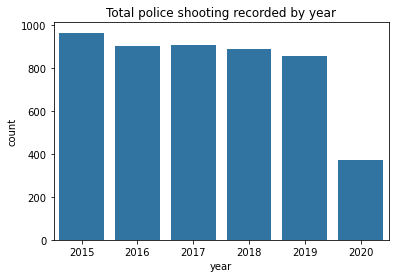

In [15]:
color_style = sb.color_palette()[0]
sb.countplot(data = police_shootings, x = 'year', color = color_style);
plt.title('Total police shooting recorded by year');

Police shooting in the United states has shown a steady decline since 2015 with least recorded year being 2020 and after it's peak of 2015.

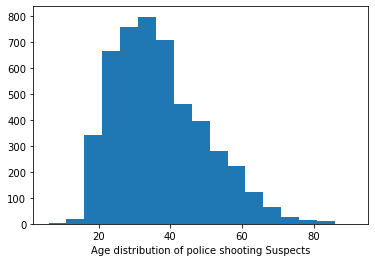

In [16]:
# Create bins with step-size 5
bins = np.arange(6, police_shootings['age'].max()+5, 5)
plt.hist(data = police_shootings, x = 'age', bins = bins);
plt.xlabel('Age distribution of police shooting Suspects')
plt.show();

As pointed out in this histogram, the age range involved in most police shootings are between 20years and 40years. The numbers reduce significantly in older population.

However, it is important to note that there are outliers in the age distribution. In this case it will be ages with less than 50 value counts.

In [17]:
police_shootings['age'].value_counts()

37    222
25    176
31    174
27    165
33    164
     ... 
13      1
91      1
79      1
78      1
81      1
Name: age, Length: 75, dtype: int64

by my definition for outliers, ages equals to or above 57 years and ages equal to or less than 17 years are the outliers.

In [18]:
outliers = police_shootings.query('age >= 57 | age <= 17')
outliers = outliers.sort_values(by='age', ascending=1)
outliers = outliers.reset_index()
del outliers['index']
outliers.head()

id           suspect       date manner_of_death      weapon  age gender  \
0   980     Jeremy Mardis 2015-11-03            shot     unarmed    6      M   
1  3229  Kameron Prescott 2017-12-21            shot     unarmed    6      M   
2  1165       Ciara Meyer 2016-01-11            shot     unarmed   12      F   
3  1883         Tyre King 2016-09-14            shot  toy weapon   13      M   
4  4386      Antonio Arce 2019-01-15            shot  toy weapon   14      M   

       race           city         state  signs_of_mental_illness  \
0     White     Marksville     Louisiana                    False   
1     White        Schertz         Texas                    False   
2     White  Penn Township  Pennsylvania                    False   
3     Black       Columbus          Ohio                    False   
4  Hispanic          Tempe       Arizona                    False   

  threat_level         flee  body_camera          arms_category  year  
0        other          Car         True                Unarmed  2015  
1        other  Not fleeing        False                Unarmed  2017  
2        other  Not fleeing        False                Unarmed  2016  
3        other         Foot        False  Other unusual objects  2016  
4        other         Foot         True  Other unusual objects  2019

In [19]:
print(outliers.shape)
outliers['age'].value_counts()

(505, 16)


59    51
58    49
17    47
57    43
61    31
16    30
60    29
62    28
63    25
64    20
65    18
66    14
69    13
67    13
68    13
15    13
70    11
71     8
76     8
72     5
84     4
73     4
74     4
75     4
14     3
77     3
80     2
83     2
82     2
6      2
79     1
81     1
78     1
12     1
13     1
91     1
Name: age, dtype: int64

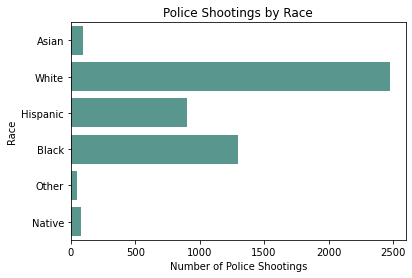

In [20]:
sb.countplot(data=police_shootings, y='race', color='#4FA095');
plt.title('Police Shootings by Race');
plt.xlabel('Number of Police Shootings')
plt.ylabel('Race')
plt.show()

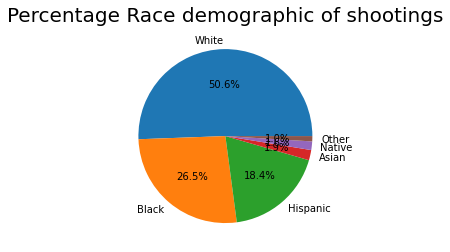

In [21]:
race_counts = police_shootings['race'].value_counts()
plt.pie(race_counts, labels= race_counts.index, autopct='%1.1f%%');
plt.title('Percentage Race demographic of shootings', fontsize = 20)
plt.show()

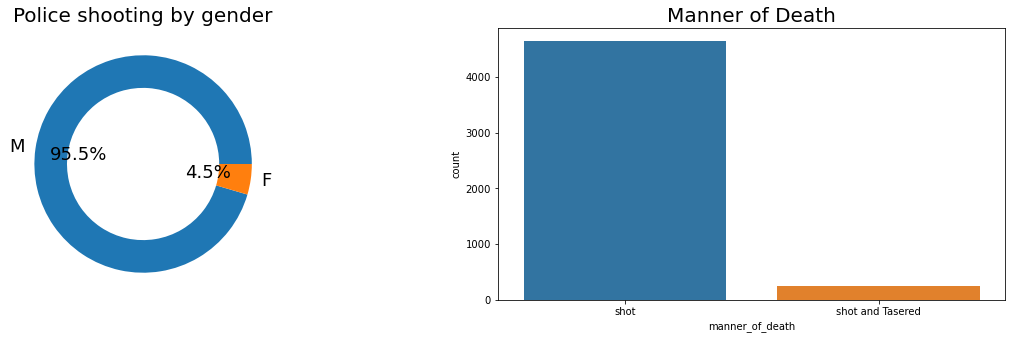

In [22]:
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
gender_counts = police_shootings['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
        wedgeprops={'width':0.3}, textprops = {"fontsize":18})
plt.title('Police shooting by gender', fontsize = 20)

plt.subplot(1, 2, 2)
sb.countplot(data=police_shootings, x='manner_of_death')
plt.title('Manner of Death', fontsize = 20)

plt.show()

Whites top the number of police shootings, making up 50.6% of total shootings, while Blacks and Hispanics make second and third at 26.5% and 18.4% respectively. Asians, the native tribes and other undefined race make up the remaining 4.5%. Only 4.5% of the shooting across the period covered in the data involved females.

<hr>

<div class='alert-success'>
    <ul>
        <li>How does these shootings vary in different states across the country?</li>
        <li>Which states make up the top 5 police shooting incidents?</li>
    </ul>
</div>

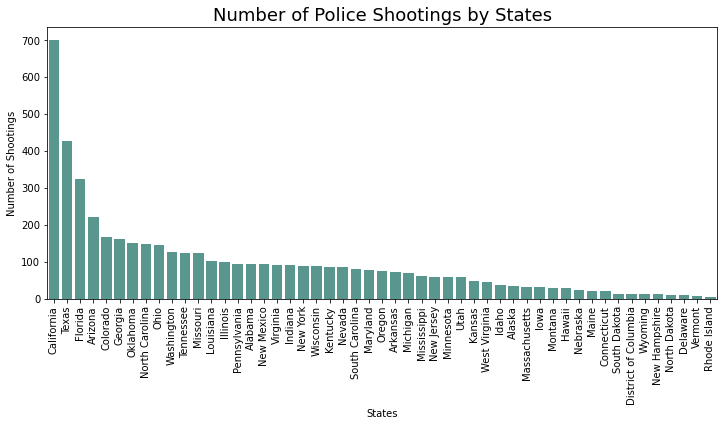

In [23]:
my_order = police_shootings['state'].value_counts().index
plt.figure(figsize= [12,5])
sb.countplot(data=police_shootings, x='state', color ='#4FA095', order=my_order)
plt.title('Number of Police Shootings by States', fontsize = 18);
plt.xlabel('States');
plt.ylabel('Number of Shootings')
plt.xticks(rotation = 90);
plt.show()

The state of California has the highest number of shootings, with Texas, Florida, Arizona and Colorado making up the top five states respectively. New Hampshire, North Dakota, Delaware, Vermont and Rhode Island make the list for least five states with police shootings.

### Summary
- There has been less shooting in recent years. I had to work on the bin size for the age distribution to get a more concise insight on its structure. it seems the ages between 30 and 40 years make up most of the shootings.


- During my analysis, i noticed their few outliers, hence i made a criteria for outliers and created a data frame for those outliers. They are ages with less than 50 value counts.

## Bivariate Exploration

<div class='alert-success'>
    <ul>
        <li>What is the gender structure of these shootings within different races</li>
        <li>Were the suspects in possession of any weapon at the time of shooting</li>
    </ul>
</div>


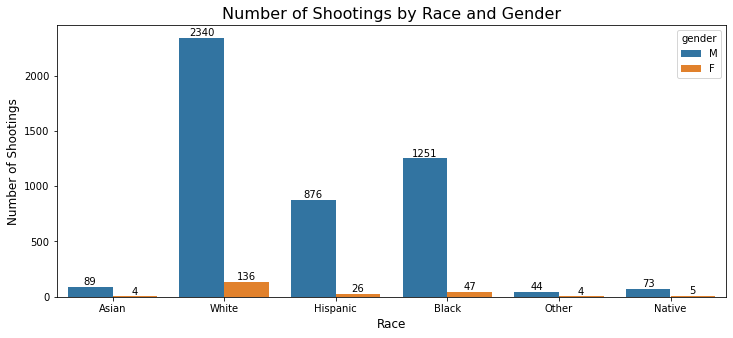

In [24]:
plt.figure(figsize=(12,5))
ax = sb.countplot(data=police_shootings, x='race', hue='gender')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Race', fontsize = 12)
plt.ylabel('Number of Shootings', fontsize = 12)
plt.title('Number of Shootings by Race and Gender', fontsize = 16)
plt.show()

Across all the races involved in all the police shooting, women make up a minor number of those cases.

In [25]:
police_shootings['arms_category'].value_counts()

Guns                     2764
Sharp objects             818
Unknown                   418
Unarmed                   348
Other unusual objects     192
Blunt instruments         122
Vehicles                  121
Multiple                   54
Piercing objects           29
Electrical devices         24
Explosives                  4
Hand tools                  1
Name: arms_category, dtype: int64

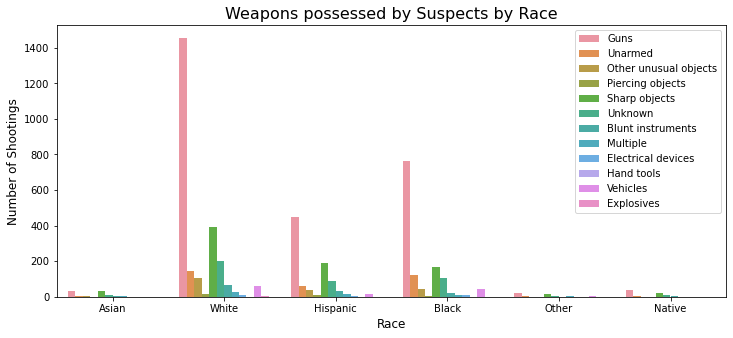

In [26]:
plt.figure(figsize=(12,5))
ax = sb.countplot(data=police_shootings, x='race', hue='arms_category')

plt.xlabel('Race', fontsize = 12)
plt.ylabel('Number of Shootings', fontsize = 12)
plt.title('Weapons possessed by Suspects by Race', fontsize = 16)
plt.legend(loc='upper right');
plt.show()

In the 4895 shooting incidents, only in 348 of this cases were the suspects unarmed. The primary weapon held by suspects at time of shooting are guns and this manifests across every race. sharp objects make a distant second in the list of weapons possessed by suspects.

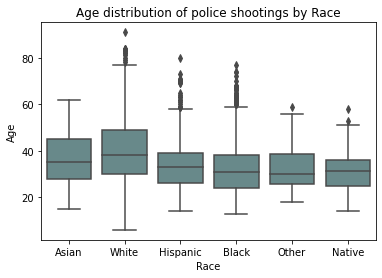

In [27]:
sb.boxplot(data=police_shootings, x='race', y='age', color='#628E90');
plt.title('Age distribution of police shootings by Race')
plt.xlabel('Race')
plt.ylabel('Age')
plt.show()

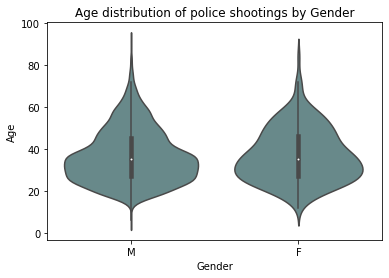

In [28]:
sb.violinplot(data=police_shootings, x='gender', y='age', color='#628E90');
plt.title('Age distribution of police shootings by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

Suspects in these shootings have mostly been between the ages of 30 and 45. The Hispanics and Blacks have outliers showing at ages 58years upwards. However whites seem to have outliers futher Upwards at 75years and above. It seems the age of both genders involved in these shootings are mostly between 30years and 40years. This can be seen in details in the outliers dataframe.

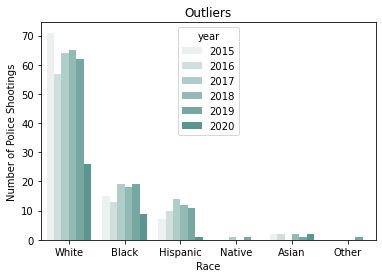

In [29]:
sb.countplot(data=outliers, x='race', hue='year', color='#4FA095');
plt.title('Outliers');
plt.ylabel('Number of Police Shootings')
plt.xlabel('Race')
plt.show()

In [30]:
outliers['race'].value_counts()

White       345
Black        93
Hispanic     55
Asian         9
Native        2
Other         1
Name: race, dtype: int64

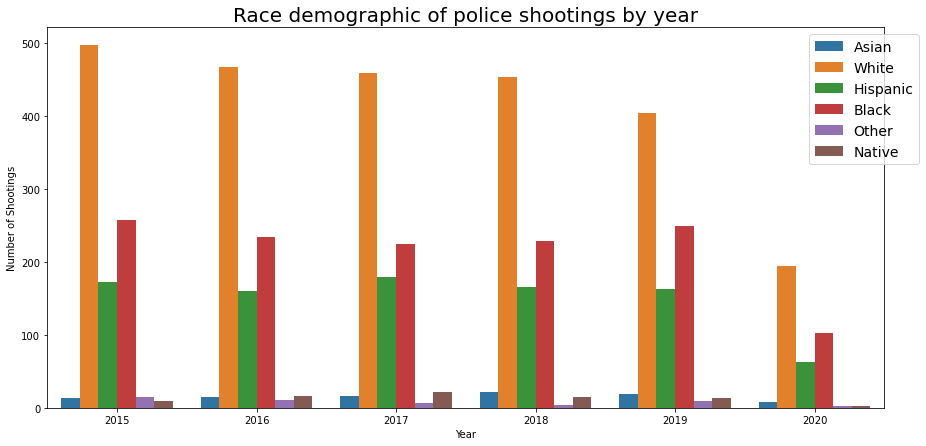

In [31]:
plt.figure(figsize=(15,7))
sb.countplot(data=police_shootings, x='year', hue='race');
plt.title('Race demographic of police shootings by year', fontsize=20)
plt.xlabel('Year');
plt.ylabel('Number of Shootings');
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1), fontsize=14);

As pointed out earlier in this visualization, the trend of these shootings have declined since 2015, but the race demographic has remained consistent, with whites, blacks and hispanics making up the top three of these shootings. 

In [32]:
age_average = round(police_shootings['age'].mean())
age_average

37

In [33]:
states_average = round(police_shootings.groupby('state').mean().age)

In [34]:
states_average =states_average.to_frame()
states_average = states_average.reset_index()
column_names = ['states', 'average_age']
states_average.columns = column_names
states_average['average_age'] = states_average['average_age'].astype('int')
states_average.head()

states  average_age
0     Alabama           40
1      Alaska           33
2     Arizona           35
3    Arkansas           39
4  California           35

In [35]:
above_avg = states_average.query('average_age > {}'.format(age_average))
above_avg = above_avg.sort_values(by='average_age', ascending=0)
above_avg = above_avg.reset_index()
del above_avg['index']
above_avg.head()

states  average_age
0        Vermont           42
1  West Virginia           41
2   Rhode Island           41
3        Alabama           40
4       New York           40

In [36]:
sequence = above_avg.sort_values(by='average_age', ascending=1).index

In [37]:
average_and_below = states_average.query('average_age <= {}'.format(age_average))
average_and_below = average_and_below.sort_values(by='average_age', ascending=1)
average_and_below = average_and_below.reset_index()
del average_and_below['index']
average_and_below.head()

states  average_age
0  North Dakota           31
1          Iowa           31
2      Delaware           32
3        Alaska           33
4      Illinois           33

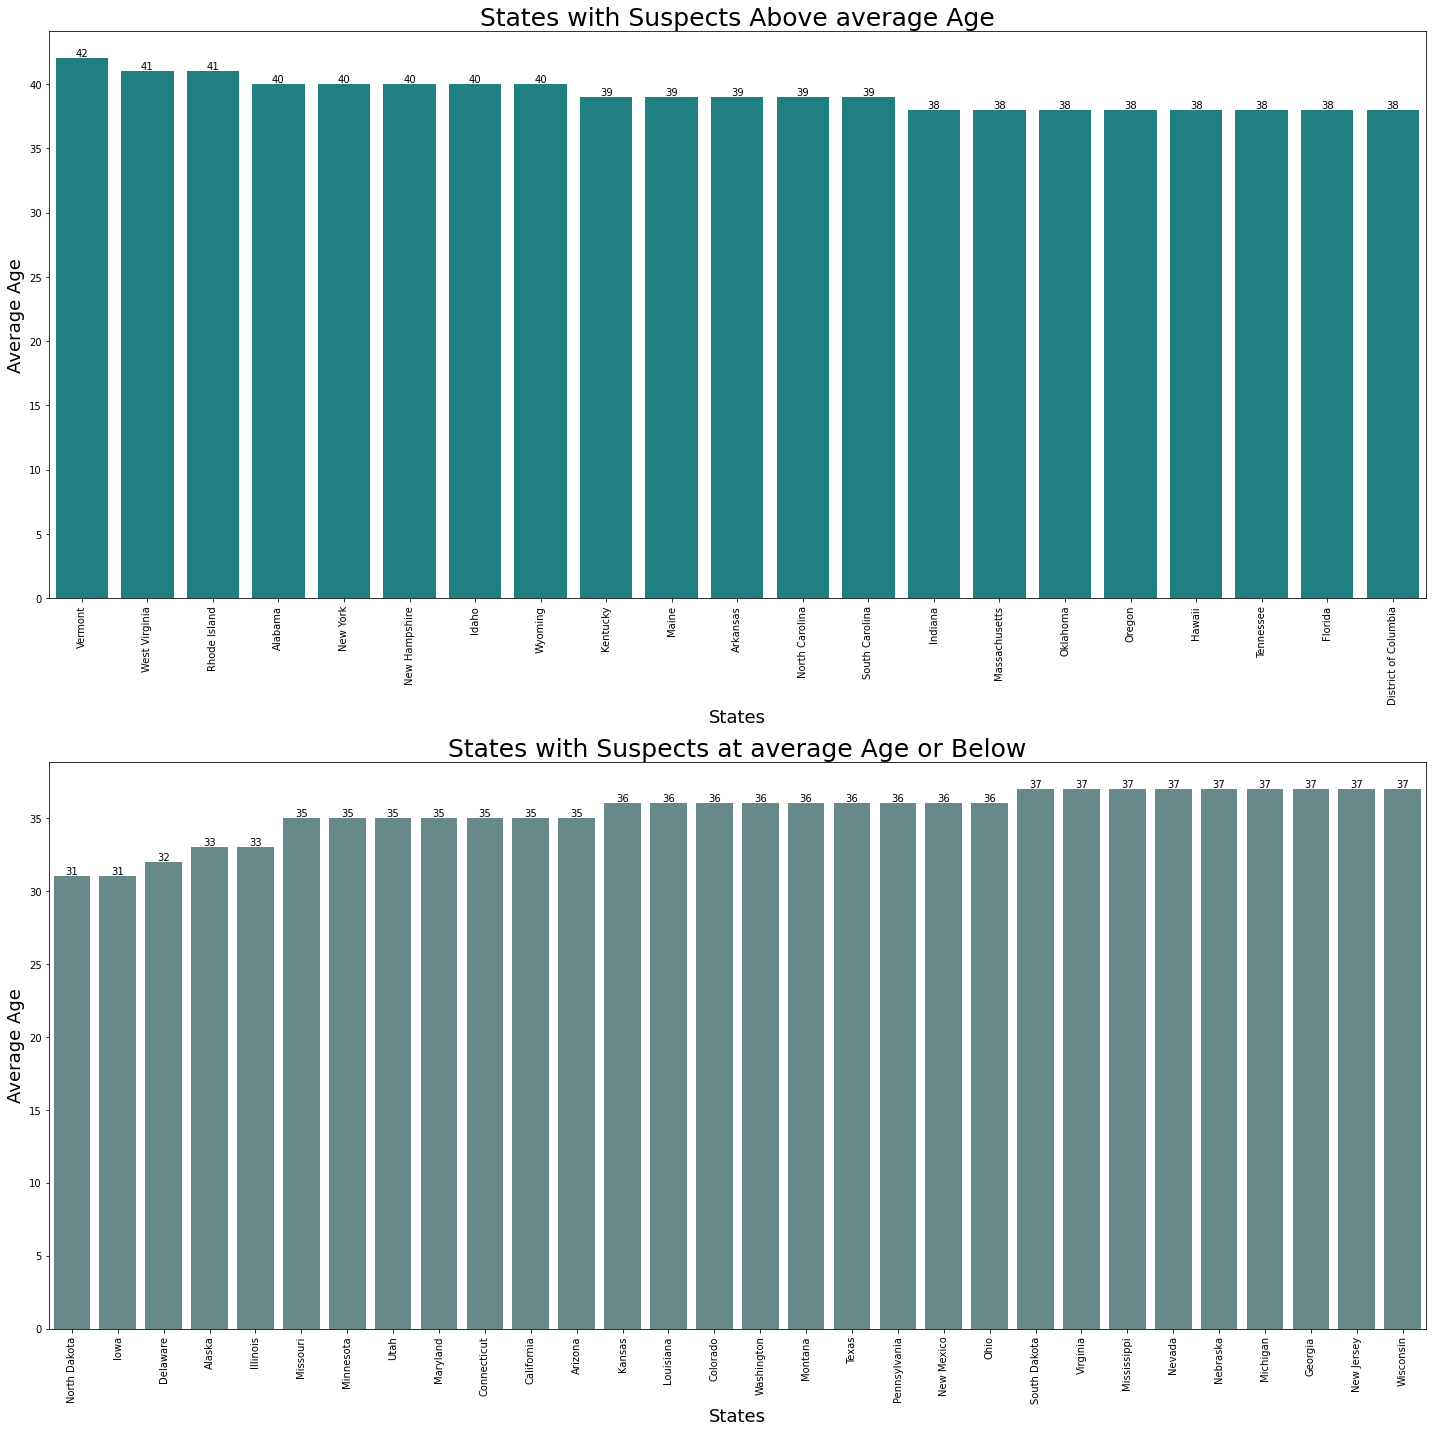

In [38]:
plt.figure(figsize = [20, 20], tight_layout=True)
plt.subplot(2, 1, 1)
ax = sb.barplot(data=above_avg, x='states', y='average_age', color='#108E90')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('States with Suspects Above average Age', fontsize= 25)
plt.xlabel('States', fontsize=18)
plt.ylabel('Average Age', fontsize=18)
plt.xticks(rotation = 90);

plt.subplot(2, 1, 2)
ax = sb.barplot(data=average_and_below, x='states', y='average_age', color='#108E90')
for i in ax.containers:
    ax.bar_label(i,)
sb.barplot(data=average_and_below, x='states', y='average_age', color='#628E90')
plt.title('States with Suspects at average Age or Below', fontsize= 25)
plt.xlabel('States', fontsize=18)
plt.ylabel('Average Age', fontsize=18)
plt.xticks(rotation = 90);


plt.show()

The national average age of suspects in these shootings is 37 years. We have 21 states who rank above the national average with Vermont leading this category and 29 state ranked at average or below average with Iowa and North Dakota making the joint least state in the category.

### Summary
- With the way the topic of police shooting has been in the media lately, it is quite impressive to see that the rate of these shootings have been in staedy decline since 2015. There seem to be much tendency for males and females within the age of 30 years and 40 years to be suspects in these shootings, in fact they make up most of the shootings in each category, although males are a distant majority in this case.


- It's also interesting to see that whites make up 50% of these shootings and also have a higher number of unarmed suspects involved. there isn't much difference in terms states averages. The difference between the highest and least state averages is 11 years. This might be lower if i factor in the outliers which were not considered in these analysis.


- There are no cases of de-escalated interactions between police and suspects in this data, but it shows in the data that most of the shooting involved suspects possessing a firearm. The data also points to the fact that Whites are most likely to become suspects in police shootings, both in cases of armed and unarmed shootings.

## Multivariate Exploration
My primary goal in this section is to determine if suspects were fleeing at the time of shooting or not, find out if there are other variables within that context and the age category associated with those variables.

In [39]:
police_shootings.groupby('race')['age'].mean()

race
Asian       36.559140
Black       32.547766
Hispanic    33.680710
Native      31.730769
Other       33.062500
White       39.907916
Name: age, dtype: float64

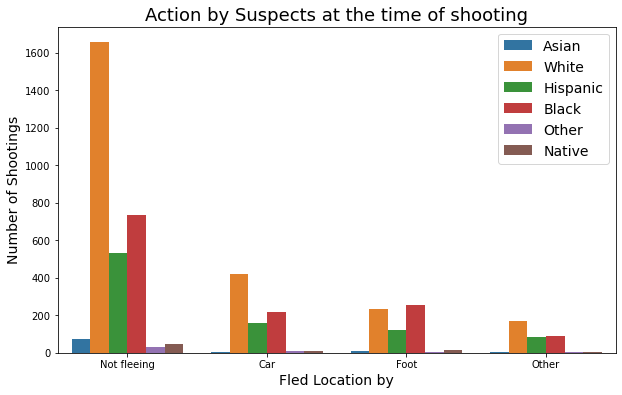

In [43]:
fig = plt.figure(figsize = [10,6])

ax = sb.countplot(data=police_shootings, x='flee', hue='race')
plt.title('Action by Suspects at the time of shooting', fontsize=18)
plt.xlabel('Fled Location by', fontsize=14)
plt.ylabel('Number of Shootings', fontsize=14)
plt.legend(loc='upper right', fontsize=14);
plt.show()

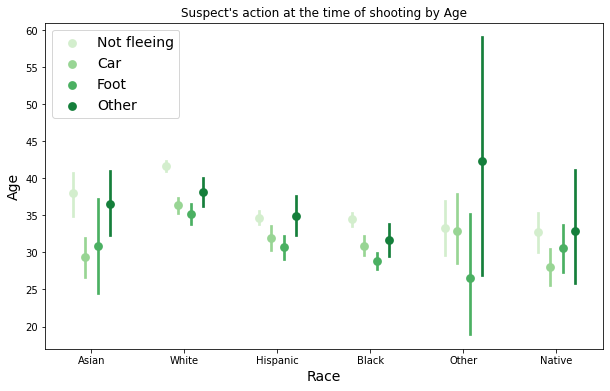

In [41]:
fig = plt.figure(figsize = [10,6])

ax = sb.pointplot(data=police_shootings, x='race', y='age', hue='flee',
                 palette='Greens', linestyles='', dodge=0.4)
plt.title("Suspect's action at the time of shooting by Age")
plt.xlabel('Race', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.legend(loc='upper left', fontsize=14);
plt.show()

In [40]:
police_shootings.groupby('gender')['age'].mean()

gender
F    37.018018
M    36.525358
Name: age, dtype: float64

### Summary
- Across all race on record apart, on average, younger suspects usually below national average tend to be on the run, either by car or foot at the time of shooting. The older population largely are not on the run as the time of shooting. Older white men are most likely not to flee at the time of incident, while in 'other' race category, suspects below 30 years are the most likely to run across all category.Generally their is a higher chance that the suspect fleeing on foot the time of shooting is a black.


- Regardless of race, theres a general pattern found within the age of suspects. Age tend to be a deciding factor on whether the suspect would flee or not.

## Conclusions
With the way the topic of police shooting has been discussed in the media lately, it is quite impressive to see that the rate of these shootings have been in staedy decline since 2015. There seem to be much tendency for males and females within the age of 30 years and 40 years to be suspects in these shootings, in fact they make up most of the shootings in each category, although males are a distant majority in this case.

Across all race on record apart, on average, younger suspects usually below national average tend to be on the run, either by car or foot at the time of shooting. The older population largely are not on the run as the time of shooting. Older white men are most likely not to flee at the time of incident, while in 'other' race category, suspects below 30 years are the most likely to run across all category.Generally their is a higher chance that the suspect fleeing on foot the time of shooting is a black.

It's also interesting to see that whites make up 50% of these shootings and also have a higher number of unarmed suspects involved. there isn't much difference in terms states averages. The difference between the highest and least state averages is 11 years.